<a href="https://colab.research.google.com/github/Jaywestty/AB-Testing-Method/blob/main/A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **A/B TESTING**

In A/B testing, two or more versions of the same digital asset are shown to different segments of the audience to see which performs the best.
An A/B test compares a control version (A) against a variation (B). Traffic is randomly split with half of the audience viewing version A and the other half viewing version B.
Data-driven insights uncover what your audience likes and responds to most, eliminating guesswork.
Key performance metrics, such as conversion rate, are used to determine which version is most successful.

**In this notebook I would be analysing a Market Campaign Dataset to gain insights and perform statistical testing to understand A/B Testing properly.**

#### **IMPORT REQUIRED LIBRARIES**

In [29]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 7)




#### **DATA UNDERSTANDING**

In [2]:
#load dataset saved on github for easy access
df = pd.read_csv('https://raw.githubusercontent.com/Jaywestty/AB-Testing-Method/refs/heads/main/marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [3]:
#Check Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


**Information About Dataset Columns**:
- **user id**: User ID (unique)
- **test group**: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
- **converted**: If a person bought the product then True, else is False
- **total ads**: Amount of ads seen by person
- **most ads day**: Day that the person saw the biggest amount of ads
- **most ads hour**: Hour of day that the person saw the biggest amount of ads

In [4]:
#Check shape of Data
shape = list(df.shape)
print(f"The Dataset has {shape[0]} rows and {shape[1]} columns.")

The Dataset has 588101 rows and 7 columns.


In [5]:
#Drop unnecessary column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
#descriptive statistics of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,588101.0,1.310692e+06,202225.983128,900000.0,1143190.0,1313725.0,1484088.0,1654483.0
total ads,588101.0,2.482088e+01,43.715181,1.0,4.0,13.0,27.0,2065.0
most ads hour,588101.0,1.446906e+01,4.834634,0.0,11.0,14.0,18.0,23.0


In [8]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

#### **EXPLANATORY DATA ANALYSIS (EDA)**

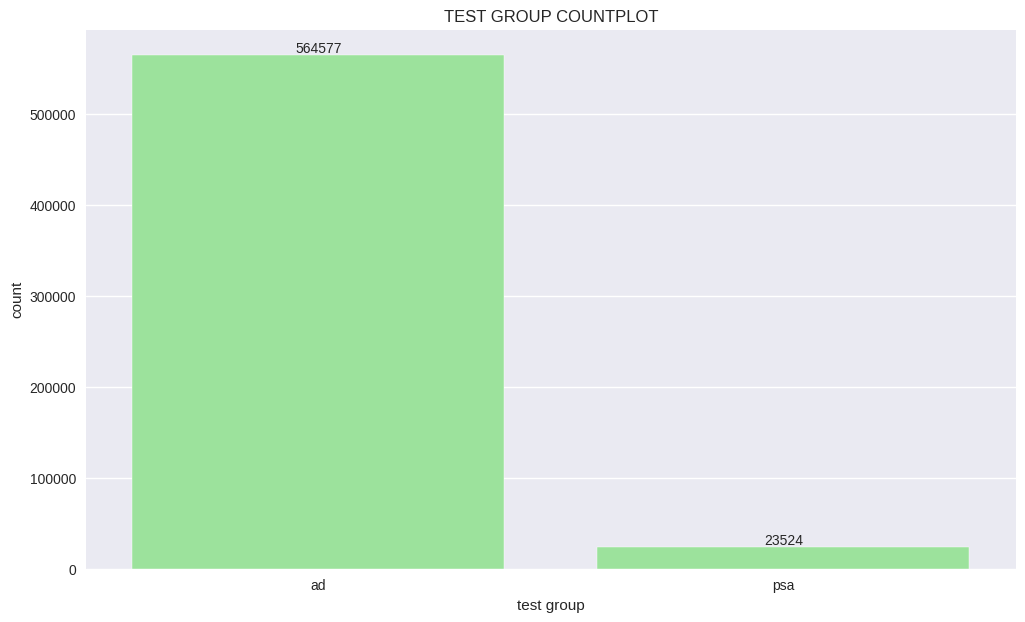

In [33]:
#Visualize test group
plot = sns.countplot(data=df, x=df['test group'], color='lightgreen')
for bars in plot.containers:
  plot.bar_label(bars)
plt.title('TEST GROUP COUNTPLOT')
plt.show()

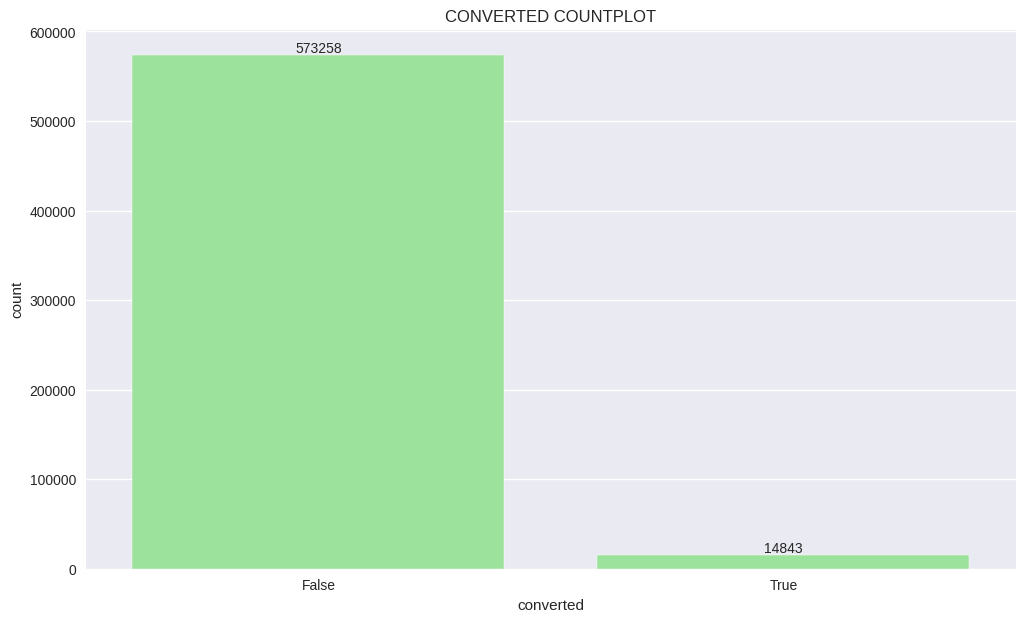

In [34]:
#Visualize Converted
plot = sns.countplot(data=df, x=df['converted'], color='lightgreen')
for bars in plot.containers:
  plot.bar_label(bars)
plt.title('CONVERTED COUNTPLOT')
plt.show()

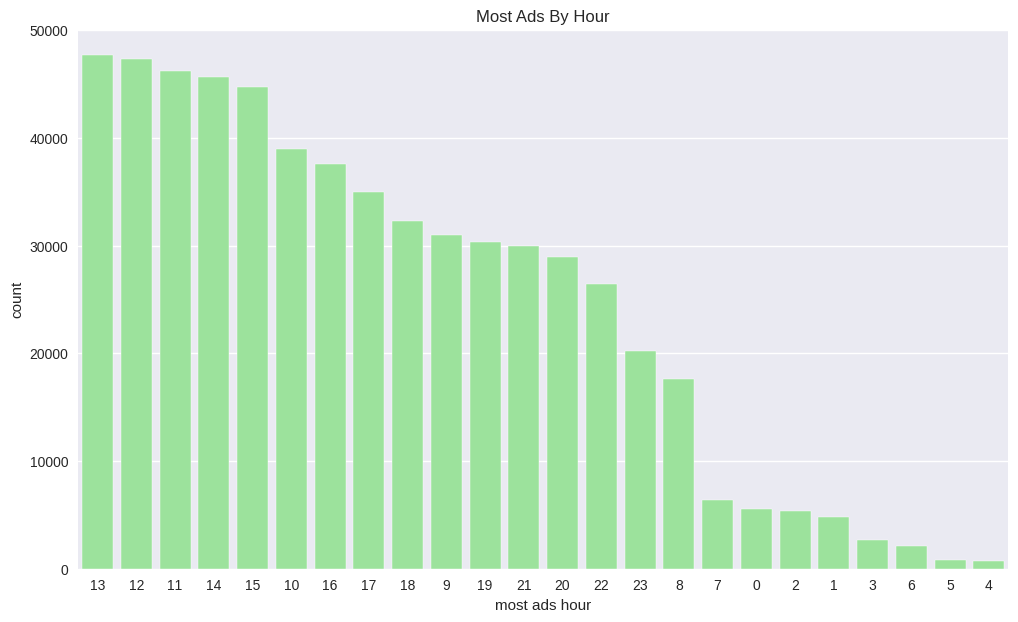

In [47]:
#Visualize the most ads hour column
sns.countplot(data=df, x='most ads hour', order=df['most ads hour'].value_counts().index, color='lightgreen')
plt.title('Most Ads By Hour')
plt.show()

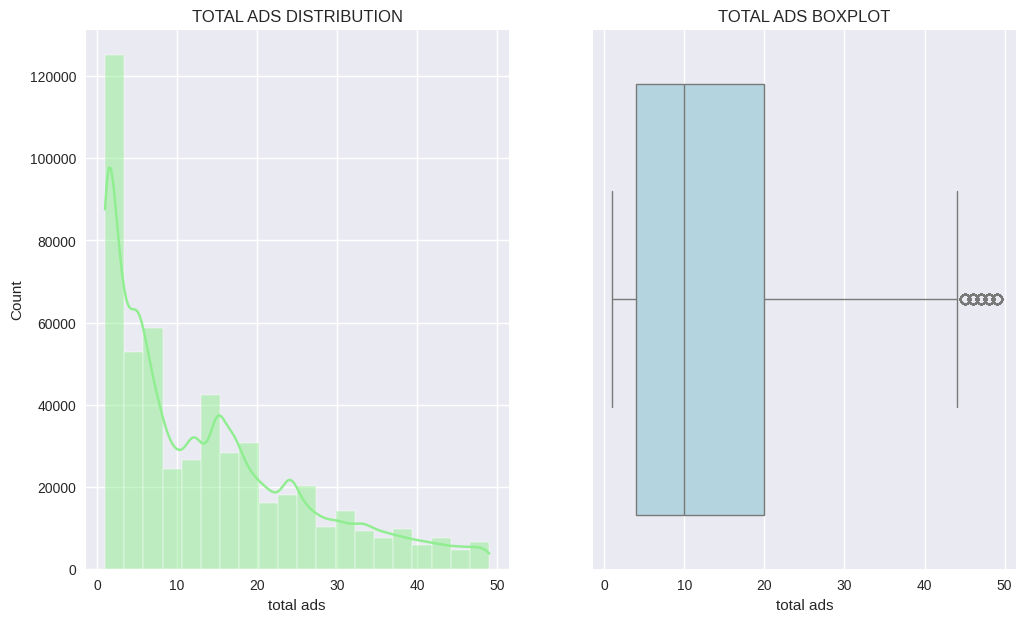

In [54]:
#Visualize test group using histogram
plt.subplot(1,2,1)
sns.histplot(df[df['total ads']<50],x='total ads', kde=True, bins=20, color='lightgreen') #filter the data for a value close to the 75th percentile just for better visualizations.
plt.title('TOTAL ADS DISTRIBUTION')

#Boxplot
plt.subplot(1,2,2)
sns.boxplot(data=df[df['total ads']<50], x='total ads', color='lightblue') #filter the data for a value close to the 75th percentile just for better visualizations.
plt.title('TOTAL ADS BOXPLOT')

plt.show()